In [2]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Project
## Analyse the Plant Growth R Dataset

In this project, we will analyze the PlantGrowth R dataset. The dataset contains two main variables, two treatment groups (trt1 and trt2) and a control group (ctrl) which contain the weight of plants within those groups.

Plant growth example
Suppose that genetically similar seeds are randomly assigned to be raised either in a nutritionally enriched environment (treatment) or under standard conditions (control) using a completely randomized experimental design.
After a predetermined period, all plants are harvested, dried and weighed. The results are expressed as dried weight in grams, for samples of 10 plants from each environment. (Dobson, A. J. (1983) An Introduction to Statistical Modelling. London: Chapman and Hall.)

Our task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining our work. In doing this we should:

1. Download and save the dataset to our repository.

2. Describe the data set in our notebook.

3. Describe what a t-test is, how it works, and what the assumptions are.

4. Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

## Task 1

Download and save the dataset in our repository.

This task has been completed and the data file is saved under files as PlantGrowth.csv

## Task 2

Describe the dataset in our notebook

In [20]:
# Read in the csv file to a dataframe
df = pd.read_csv('files/PlantGrowth.csv') # https://www.geeksforgeeks.org/reading-csv-files-in-python/
# remove the column labelled rownames as it holds no values of interest
df.drop(columns=['rownames'], inplace=True)
# show the statistical data of the csv file
df.describe()  # https://www.w3schools.com/python/pandas/ref_df_describe.asp#:~:text=The%20describe%28%29%20method%20returns%20description%20of%20the%20data,average%20%28mean%29%20value.%20std%20-%20The%20standard%20deviation.


,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


In [21]:
# Show all of the data in the csv file
df

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl
5,4.61,ctrl
6,5.17,ctrl
7,4.53,ctrl
8,5.33,ctrl
9,5.14,ctrl


From the above tables, we can see there are 30 rows in total. The data is split into 3 groups; ctrl, trt1 and trt2, with weights ranging from 3.59 to 6.31. Next we proceed to split the data by group.

In [22]:
# Split out the data into the groups
ctrl = df[df['group'] == 'ctrl'] # https://www.geeksforgeeks.org/python-extracting-rows-using-pandas-iloc/?ref=lbp
trt1 = df[df['group'] == 'trt1']
trt2 = df[df['group'] == 'trt2']

Now that we have the data individually grouped, we can use the describe command as before to see the statistical details about the group data

For the ctrl group, we can see the mean of the weight is 5.032, with values in the range 4.17 to 6.11

In [23]:
ctrl.describe()

,weight
count,10.000000
mean,5.032000
std,0.583091
min,4.170000
25%,4.550000
50%,5.155000
75%,5.292500
max,6.110000


For the trt1 group, we can see the mean of the weight is 4.661, with values in the range 3.59 to 6.03

In [24]:
trt1.describe()

,weight
count,10.000000
mean,4.661000
std,0.793676
min,3.590000
25%,4.207500
50%,4.550000
75%,4.870000
max,6.030000


For the trt2 group, we can see the mean of the weight is 5.526, with values in the range 4.92 to 6.31

In [25]:
trt2.describe()

,weight
count,10.000000
mean,5.526000
std,0.442573
min,4.920000
25%,5.267500
50%,5.435000
75%,5.735000
max,6.310000


Now that we have the data split out, we can see the statistical spread of the data. It is much easier to visualise this using boxplots.

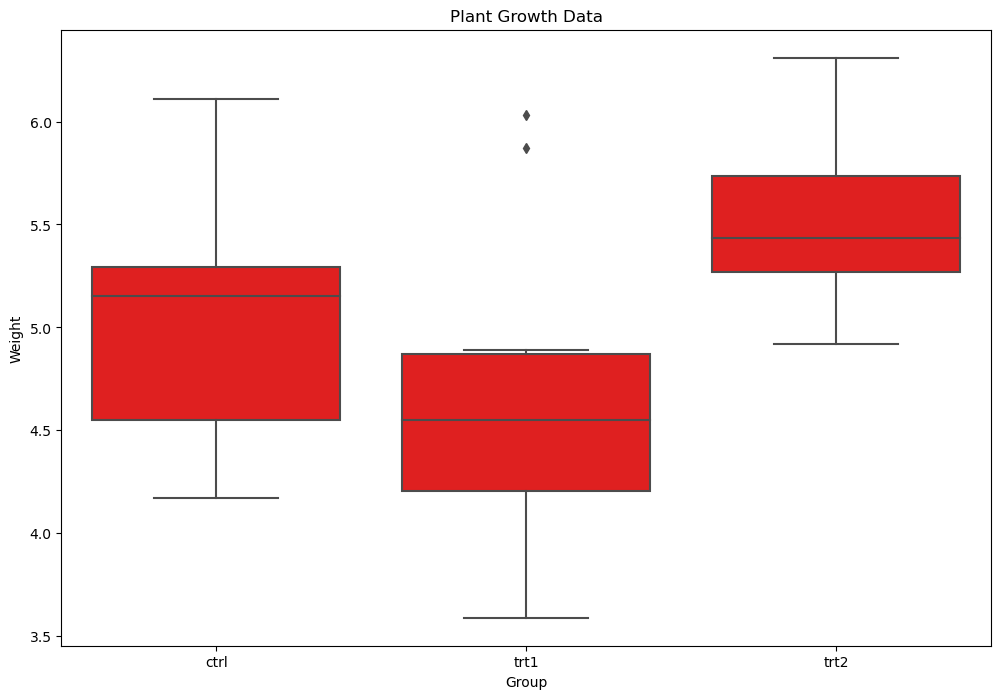

In [31]:
# Create boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(x='group', y='weight', data=df, color='red')
plt.title("Plant Growth Data")
plt.xlabel("Group")
plt.ylabel("Weight")
plt.show()


As can be seen from the boxplot above, the group trt1 is lower than the trt2 group, this shows a definite difference between the groups and would require investigation as to why the weights were markedly different. The ctrl group has more in common with the trt1 group than the trt2 group

## Task 3

Describe what a t-test is, how it works, and what the assumptions are

The t-test was originally created by a chemist who was working for the Guinness Brewing Company to measure the consistent quality of stout.
The t-test is a statistical method to test if the mean value of two groups are significantly different. It tests if the null hypothesis holds true, which assumes there is no difference between the means values of the two groups. It calculates a value using the mean values, the standard deviation and the size of the sample and it calculates a value it calls the p-value, which is compared to a statistical norm (usually 0.05) to determine if the hypothesis holds true or not.

Assumptions for the t-test

[Assumptions](https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp)

1. The scale of measurement of the data must be continuous or ordinal

2. Samples are randomly Random selected

3. When plotted, the data should show a normal distribution

4. The standard deviation across the groups should show what is known as Homogeneity of Variance. They should be approximately equal.

5. To ensure independence, the samples of one group are taken independently to the samples of the other group.